In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi'] = 500
matplotlib.rcParams['text.usetex'] = False
from scipy import signal

In [2]:
R = 0.082
a = 3.643
b = 0.0427
v = np.linspace(b+0.001, 0.3, 400)
T = [300,302,303,304,306,308,310,312,315]
p = [R*T_i/(v-b) - a/v**2 for T_i in T ]

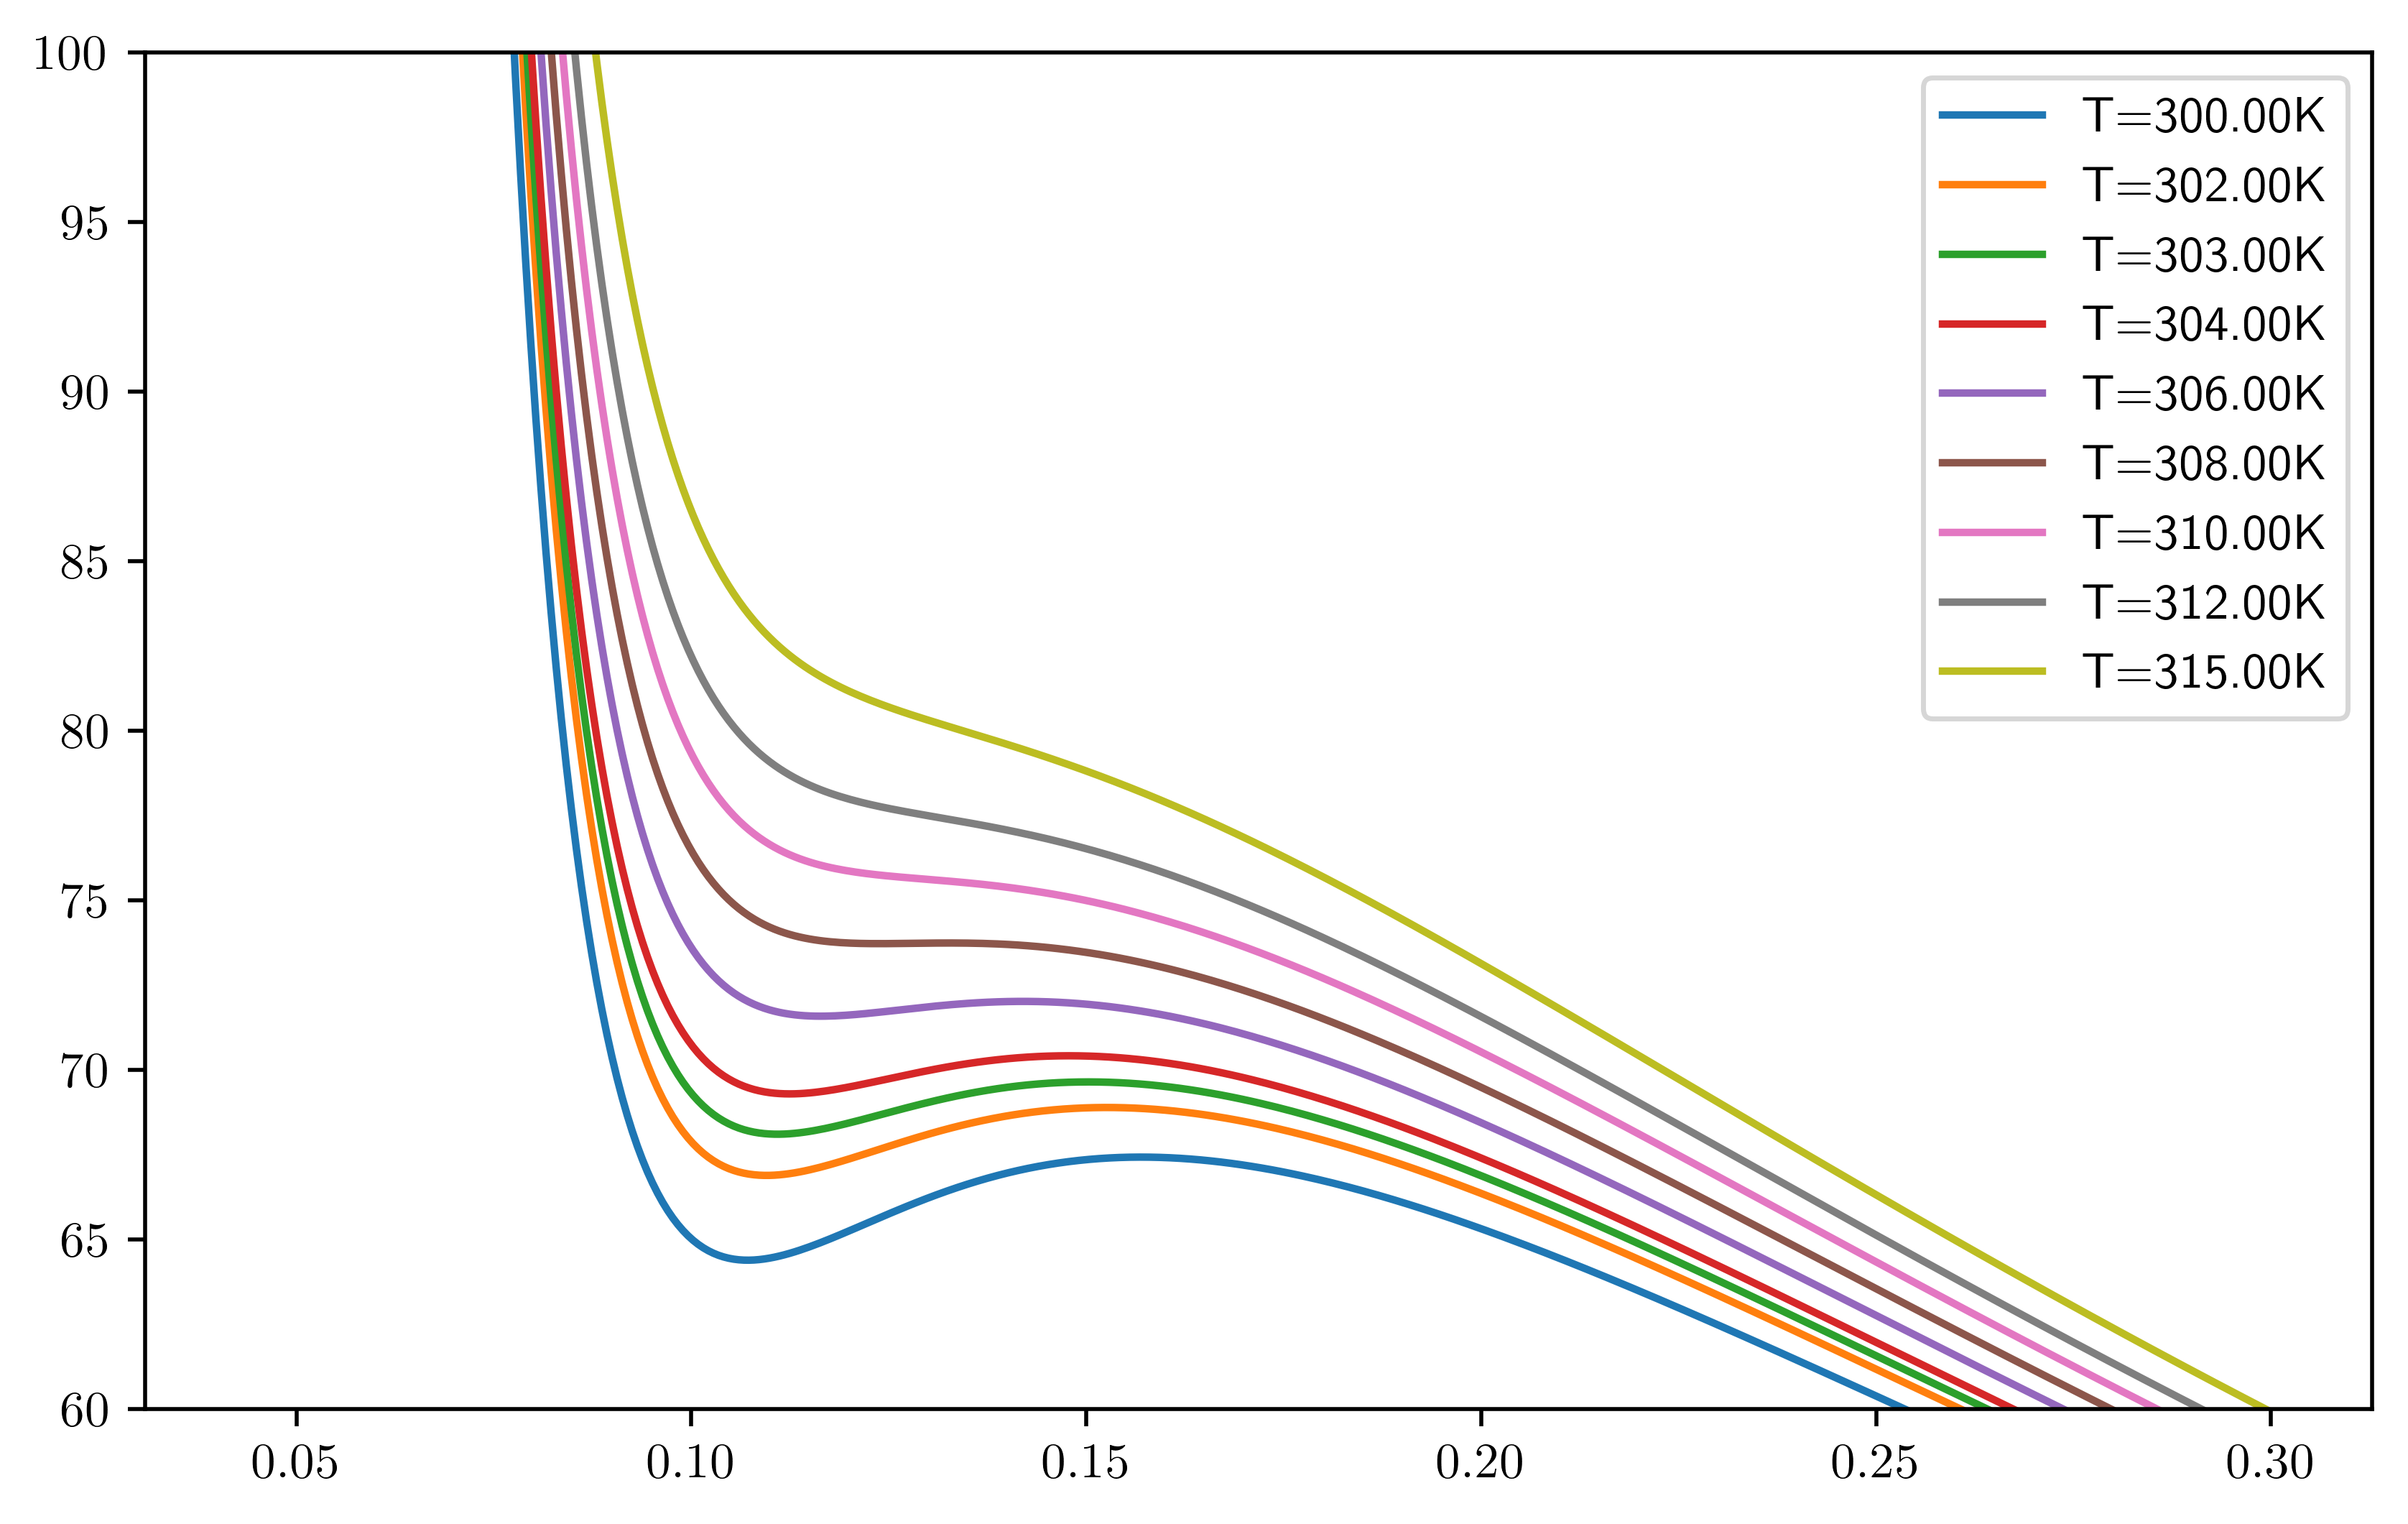

In [3]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
for idx, p_i in enumerate(p):
    ax.plot(v, p_i, label=r"T={:.2f}K".format(T[idx]))
ax.set_ylim([60, 100])
ax.legend()
fig.savefig('Van de Wass.pdf')

In [10]:
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
delta = 8000
v_1 = np.linspace(b+0.02, 0.3, delta)
p_1 = np.linspace(50, 85, delta)

T_c = np.linspace(270, 312,1000)
def extreme(T_c):
    res = np.zeros((len(T_c), 4))
    for idx, T_j in enumerate(T_c):
        v2 = np.linspace(b+0.02, 0.3, delta)
        p_v = R*T_j/(v2-b)-a/v2**2
        ma = signal.argrelextrema(p_v, np.greater)[0]
        mi = signal.argrelextrema(p_v, np.less)[0]
        if len(ma) != 0 and len(mi) != 0:
            res[idx, 0], res[idx,1] = v_1[int(mi)], p_v[int(mi)]
            res[idx, 2], res[idx, 3] = v_1[int(ma)], p_v[int(ma)]
    res = res[np.where(res>0),:]
    return res[0]

res = extreme(T_c)
pv_cri = (0.128, 74.00)
T_cri= 308.28

V, P = np.meshgrid(v_1, p_1)
Z = (P+a/V**2)*(V-b)/R
# This custom formatter removes trailing zeros, e.g. "1.0" becomes "1", and
# then adds a percent sign.
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} " if plt.rcParams["text.usetex"] else f"{s} K"

chinese = matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simkai.ttf')
# Basic contour plot

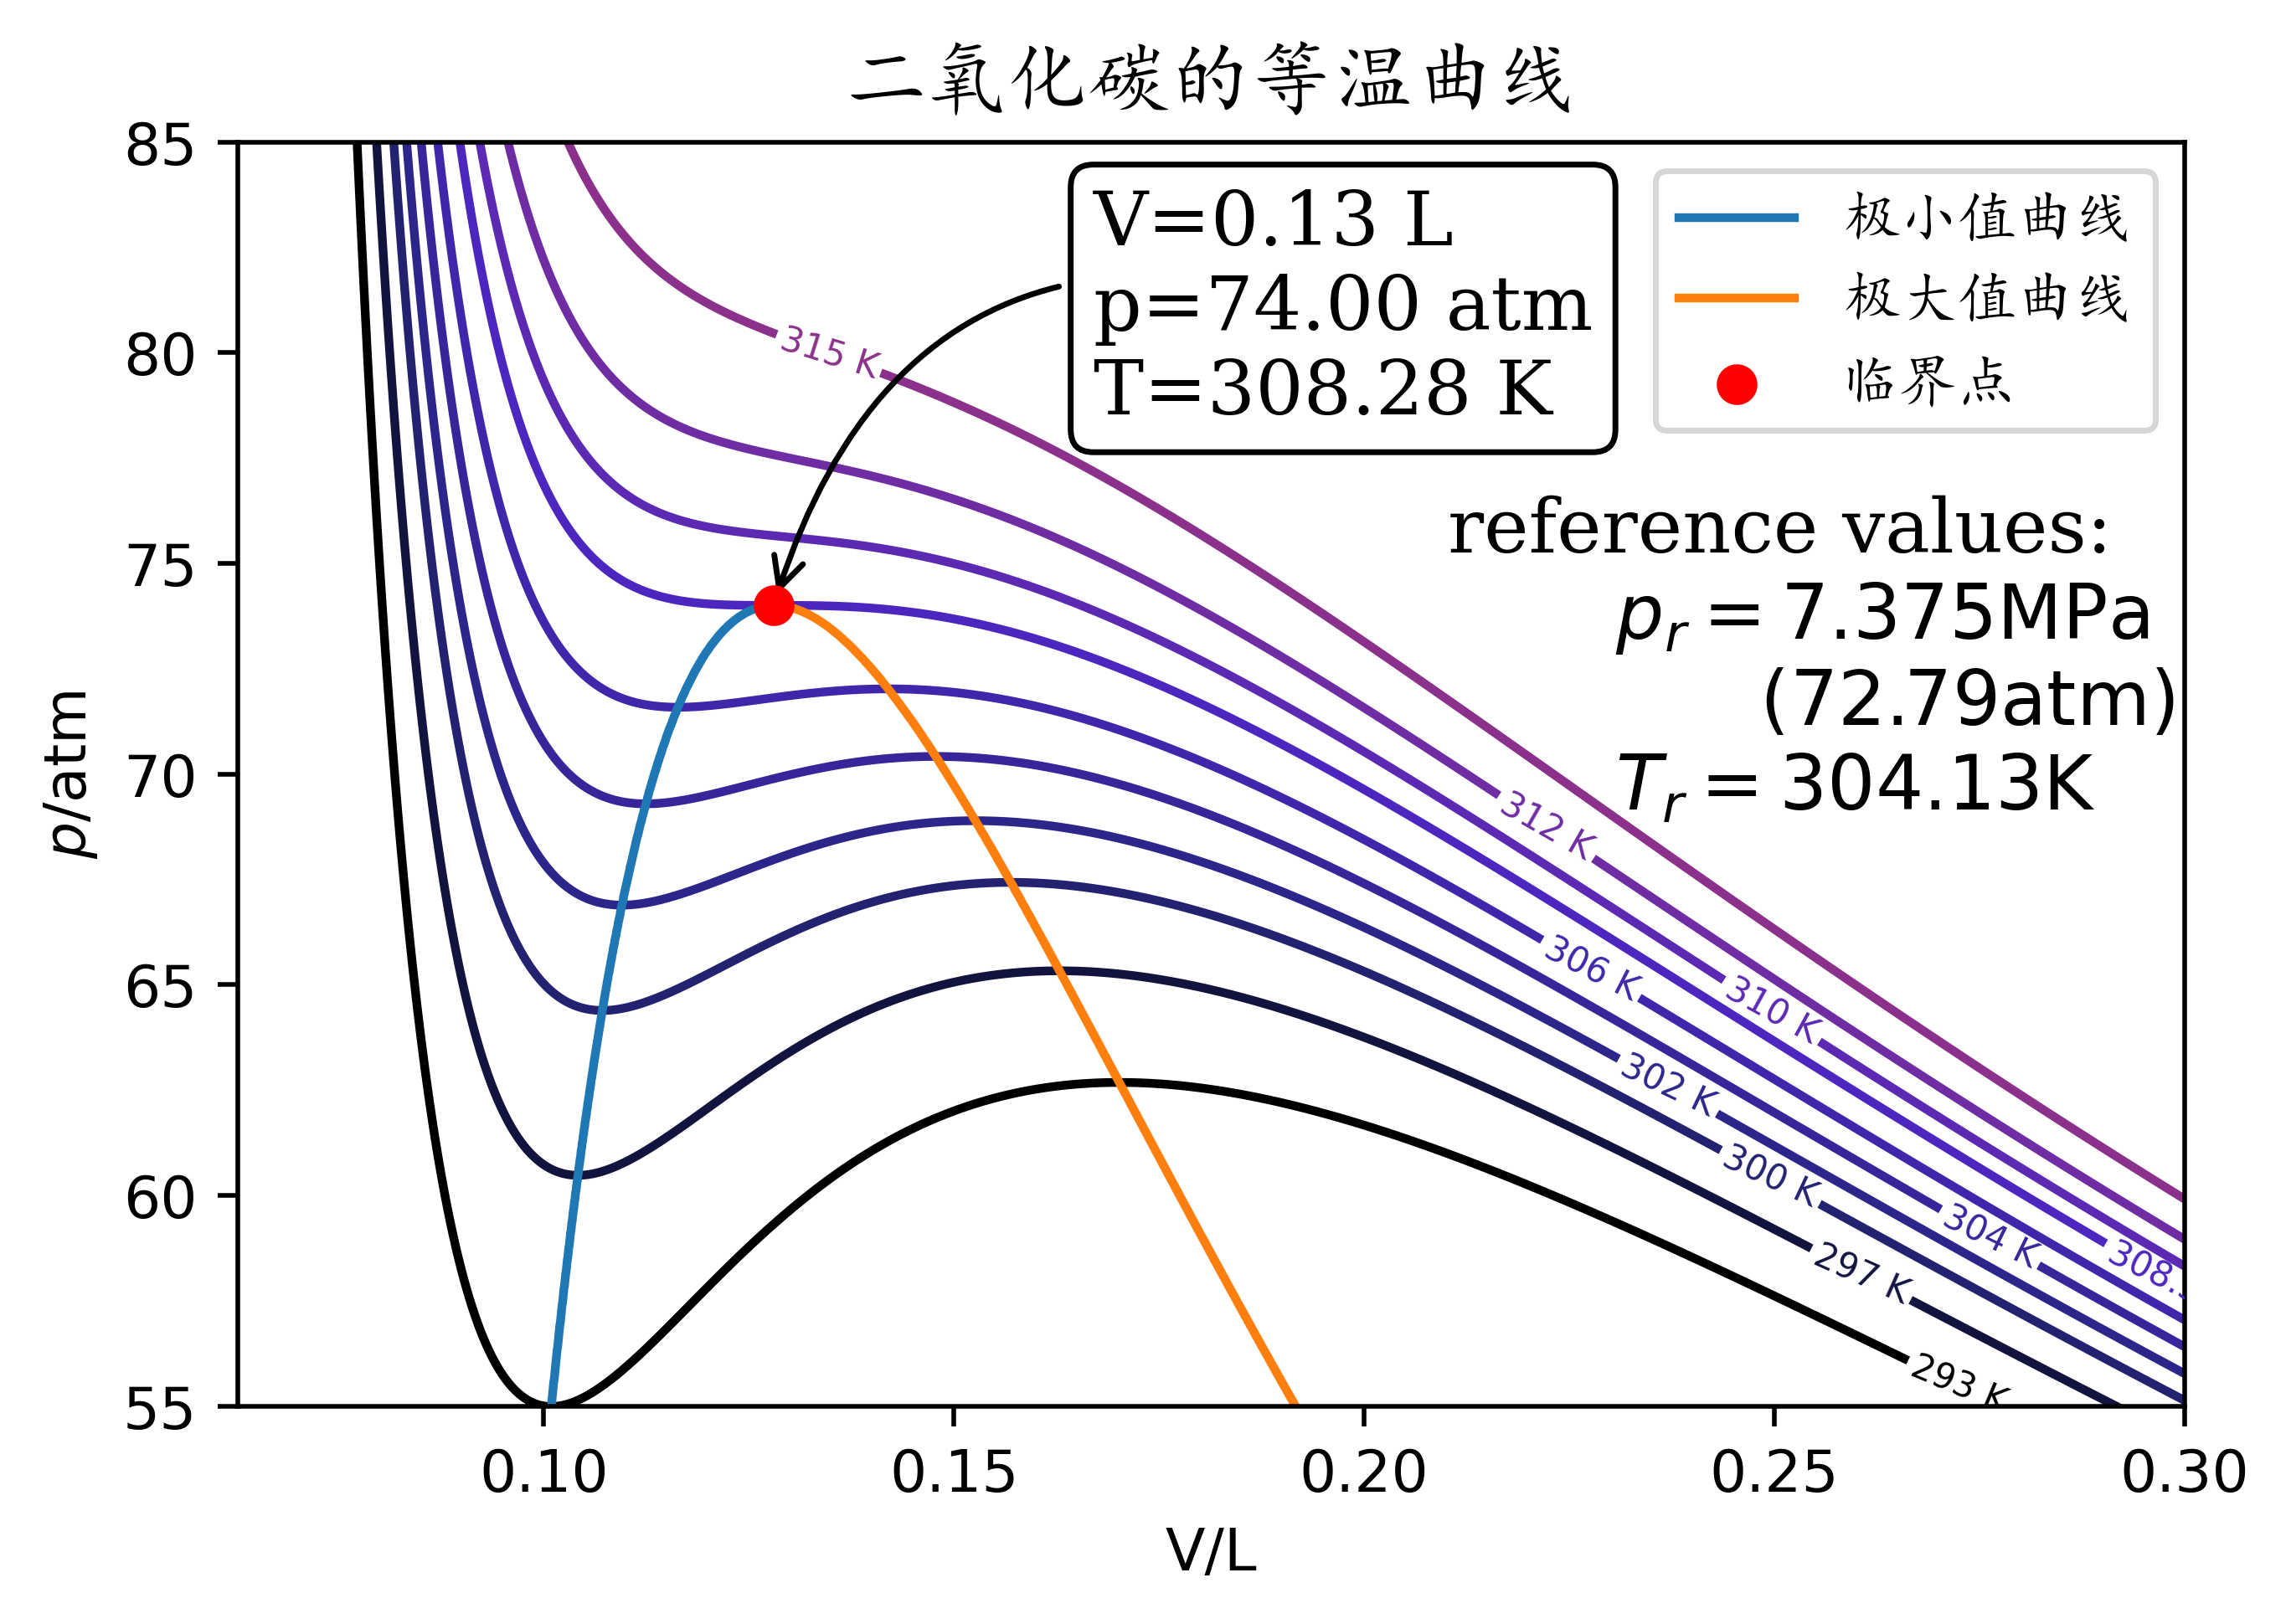

In [11]:
fig, ax = plt.subplots()
CS = ax.contour(V, P, Z,levels=[293, 297,300,302,304,306,308.28,310,312, 315,355],cmap='CMRmap')
ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=6)
ax.plot(res[:,0], res[:,1],label=r"极小值曲线")
ax.plot(res[:,2], res[:,3], label=r"极大值曲线")


ax.scatter(*pv_cri, label="临界点",zorder=10,color="red")
ax.annotate("V={:.2f} L \np={:.2f} atm\nT={:.2f} K".format(*pv_cri,T_cri), 
            fontsize=13, family="serif", xy= pv_cri, xycoords="data", xytext=(+55,33), textcoords="offset points",
           arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.5"), bbox={'boxstyle':'round','fc':"w", 'ec':"k"})
ax.annotate(r"reference values:" "\n" "       $p_r = 7.375 \mathrm{MPa}$" "\n" r"             $(72.79 \mathrm{atm})$" "\n" "       $T_r = 304.13 \mathrm{K}$", 
            fontsize=13, family="serif", xy= pv_cri, xycoords="data", xytext=(+116,-35), textcoords="offset points")

ax.set_ylim([55, 85])
ax.set_title(u"二氧化碳的等温曲线", fontproperties=chinese,fontsize=14)
ax.set_xlabel("V/L")
ax.set_ylabel(r"$p/\mathrm{atm}$")
ax.legend(prop=chinese)

In [12]:
fig.savefig("F:/Van de Wass Eq.pdf",)